In [8]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [9]:
n = 1000

rs = np.random.RandomState(125)

X,y = exp_tools.gen_quadrant_problem_2weak(n=n,random_state=rs)

Generating dataset with d=5,n=1000,strongly=0,weakly=2, partition of weakly=None


In [23]:
from sklearn.utils import resample
import math
n_bootstraps=5
data = X, y
perc = 0.8
n = data[0].shape[0]
bs = [resample(*data, replace=True, n_samples=math.floor(perc * n),
                           random_state=rs) for bs in range(n_bootstraps)]


In [67]:
intervals = []
features = []
dist_mats = []
for X,y in bs:
    f = FRIClassification(debug=True)
    f.fit(X,y)
    intervals.append(f.interval_)
    clust, link, feat_points,dist_mat = f.community_detection2()
    features.append(feat_points)
    dist_mats.append(dist_mat/f.optim_L1_)

loss 3.58006599692e-08
L1 170.537291035
offset 0.14856267713415727
C 100
score 0.993749560491
coef:
[[  5.11876098e+01]
 [  5.18283546e+01]
 [  2.54679599e+01]
 [ -2.54679600e+01]
 [  5.11036088e-01]
 [ -5.63311759e-01]
 [  7.66878121e-03]]
loss 14.4128109268
L1 20.0822013752
offset 0.15863698980738897
C 1
score 0.99875003713
coef:
[[  6.35372534e+00]
 [  5.81505804e+00]
 [  3.03121409e+00]
 [ -3.03121409e+00]
 [ -1.13239707e-10]
 [ -2.29354815e-02]
 [ -2.39966687e-03]]
Solver 'ECOS' failed. Try another solver.
loss 18.0879793562
L1 19.5103404437
offset 0.049656218224933796
C 1
score 0.98375826002
coef:
[[  5.73160713e+00]
 [  5.86822441e+00]
 [  2.90871206e+00]
 [ -2.90871204e+00]
 [  1.05416076e-03]
 [  1.50595848e-01]
 [  1.67767478e-01]]
loss 5.42008953957
L1 50.4264481511
offset 0.28435930582801977
C 10
score 0.996250158223
coef:
[[ 14.90751575]
 [ 14.85911495]
 [  7.58706127]
 [ -7.58706141]
 [  0.25519385]
 [  0.17405911]
 [  0.47221925]]
loss 1.056181055
L1 72.570905449
offset 

In [68]:
dist_mats[0]

array([  1.84314622e-03,   4.17247946e-01,   4.17247945e-01,
         4.82305703e-02,   4.85291557e-02,   3.20659711e-02,
         4.16508000e-01,   4.16508000e-01,   4.99023273e-02,
         4.92947996e-02,   3.20504711e-02,   8.19481636e-10,
         4.19168179e-01,   4.19753992e-01,   4.17668994e-01,
         4.19168179e-01,   4.19753991e-01,   4.17668993e-01,
         3.57694556e-03,   4.74961222e-02,   4.71115286e-02])

In [44]:
only1 = [feat[0] for feat in dist_mats]

In [104]:
mats = pd.DataFrame(dist_mats)

In [105]:
mats

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.001843,0.417248,0.417248,0.048231,0.048529,0.032066,0.416508,0.416508,0.049902,0.049295,...,8.194816e-10,0.419168,0.419754,0.417669,0.419168,0.419754,0.417669,0.003577,0.047496,0.047112
1,0.006979,0.418800,0.418800,0.044708,0.045648,0.044260,0.416515,0.416515,0.041495,0.043222,...,2.126504e-10,0.418690,0.419788,0.419834,0.418690,0.419788,0.419834,0.014500,0.008693,0.007284
2,0.004315,0.417949,0.417949,0.049997,0.049381,0.050333,0.416320,0.416320,0.044316,0.042842,...,2.090938e-12,0.416358,0.413107,0.415026,0.416358,0.413107,0.415026,0.027512,0.055506,0.029493
3,0.001990,0.424397,0.424397,0.049364,0.046517,0.062656,0.422907,0.422907,0.042675,0.039339,...,2.747180e-10,0.416907,0.420286,0.420196,0.416907,0.420286,0.420196,0.017342,0.039057,0.050794
4,0.011279,0.421058,0.421058,0.039905,0.038856,0.041080,0.426078,0.426078,0.039761,0.041604,...,5.581980e-11,0.425163,0.422377,0.422324,0.425163,0.422377,0.422324,0.014374,0.019792,0.005955


In [70]:
import scipy
def make_square(dist_mat):
    return = scipy.spatial.distance.squareform(dist_mat)

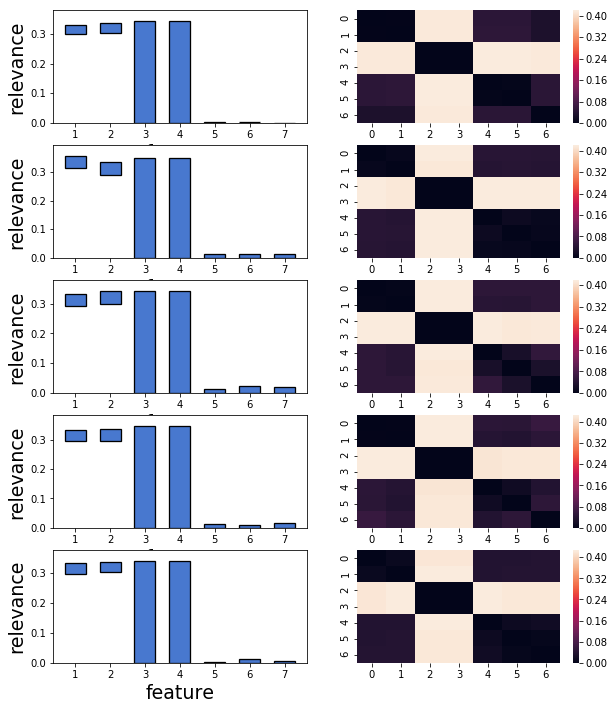

In [71]:
import seaborn as sns
from fri.plot import plot_relevance_bars
fig, axs = plt.subplots(n_bootstraps,2,figsize=(10,12))
for i,ints in enumerate(intervals):
    plot_relevance_bars(axs[i][0],ints)
    sns.heatmap(make_square(dist_mats[i]),ax=axs[i,1])

In [55]:
clust, link, feat_points,dist_mat = f.community_detection2(X,y)


In [56]:
import scipy
dist_mat = scipy.spatial.distance.squareform(dist_mat)

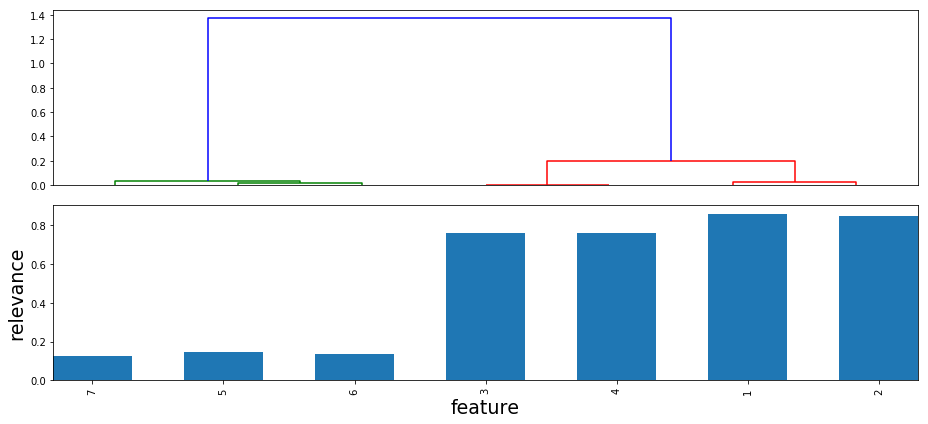

In [57]:
p = plot_dendrogram_and_intervals(f.interval_,link)

In [12]:
import pandas as pd
pd.DataFrame(X).corr()

,0,1,2,3,4,5,6
0,1.000000,0.041688,-0.013250,0.013250,0.068489,0.009713,-0.024199
1,0.041688,1.000000,0.009897,-0.009897,0.017740,0.001767,0.001497
2,-0.013250,0.009897,1.000000,-1.000000,-0.002976,0.050858,0.021815
3,0.013250,-0.009897,-1.000000,1.000000,0.002976,-0.050858,-0.021815
4,0.068489,0.017740,-0.002976,0.002976,1.000000,-0.010376,-0.000962
5,0.009713,0.001767,0.050858,-0.050858,-0.010376,1.000000,-0.047092
6,-0.024199,0.001497,0.021815,-0.021815,-0.000962,-0.047092,1.000000


In [14]:
import seaborn as sns

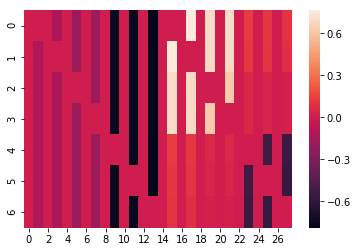

In [15]:
sns.heatmap(feat_points)

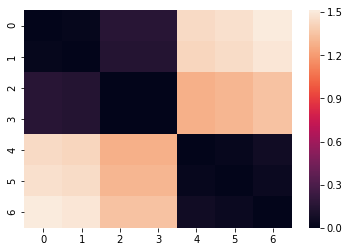

In [16]:
sns.heatmap(dist_mat)

# Distance test

In [19]:
import fri.utils

In [38]:
fri.utils.similarity2(feat_points[2],feat_points[3])

2.0524053863447112e-13

In [32]:
from scipy.spatial.distance import euclidean

In [39]:
euclidean(feat_points[2],feat_points[3])

0.9251651425164945

# Correlation based grouping

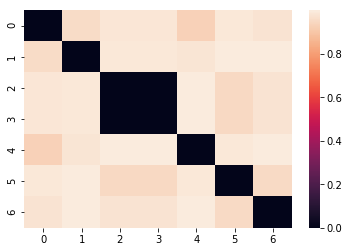

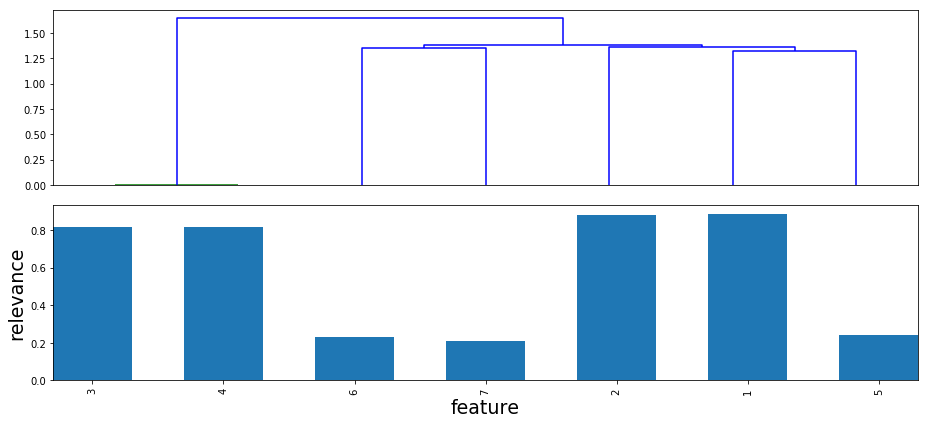

In [17]:
import pandas as pd
import seaborn as sns
corr_pd = pd.DataFrame(X).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot_dendrogram_and_intervals(f.interval_,z)